In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)
import pickle

In [2]:
def nondecreasing_time(aux):
    aux[:,0] = np.abs(aux[:,0])
    flag1 = True
    mask = np.ones(aux.shape[0], dtype=bool)
    while flag1:
        flag2 = True
        for i in range(1,aux.shape[0]):
            if aux[i,0]<aux[i-1,0]:
                mask[i] = 0
                aux = aux[mask]
                mask = np.ones(aux.shape[0], dtype=bool)
                flag2 = False
                break
        if flag2:
            flag1 = False
    return aux

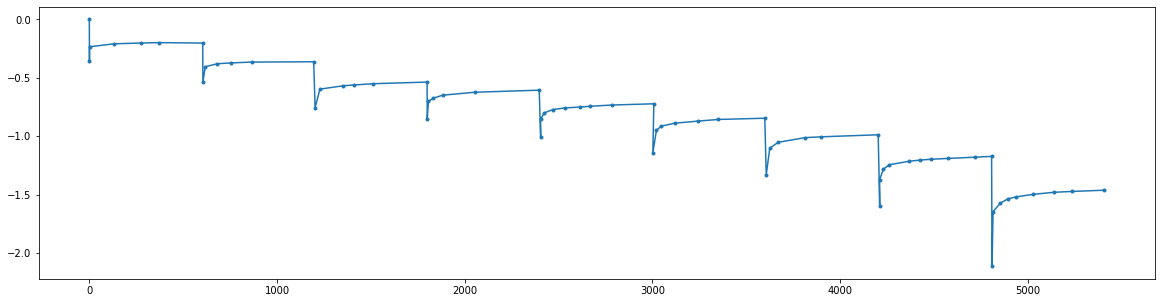

In [2]:
NR1_multistep = np.genfromtxt('Rubber/NR1/multistep.csv', delimiter=',')
NR1_multistep[2,0] += 7.0

fig, ax = plt.subplots(figsize=[20,5])
ax.plot(NR1_multistep[:,0], NR1_multistep[:,1],'.-')

with open('Rubber/NR1/multistep.npy', 'wb') as f:
    np.save(f,NR1_multistep, allow_pickle=True)

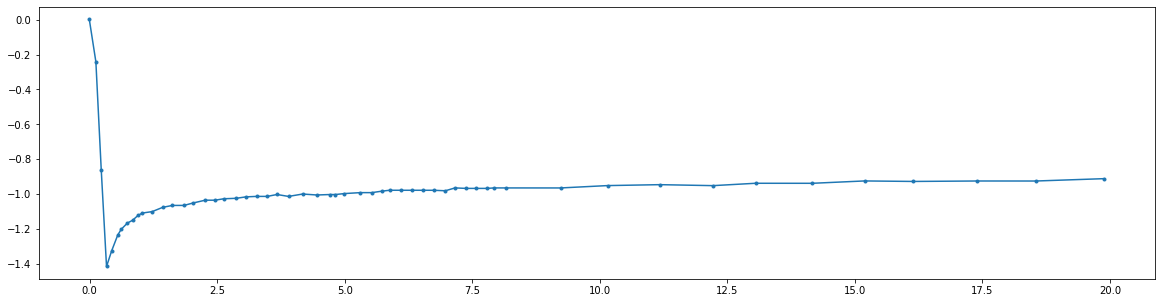

In [3]:
NR1_singlestep = np.genfromtxt('Rubber/NR1/singlestep.csv', delimiter=',')
time, sgm_x = NR1_singlestep.T
lm = np.ones(time.shape[0])*0.7
lm[0] = 1.0

avail_data_x = [time[0], time[3]]
avail_data_y = [1.0, 0.7]
lm[1:3] = np.interp(time[1:3], avail_data_x, avail_data_y)


fig, ax = plt.subplots(figsize=[20,5])
ax.plot(time, sgm_x,'.-')

with open('Rubber/NR1/singlestep.npy', 'wb') as f:
    np.save(f,[time, lm, sgm_x], allow_pickle=True)

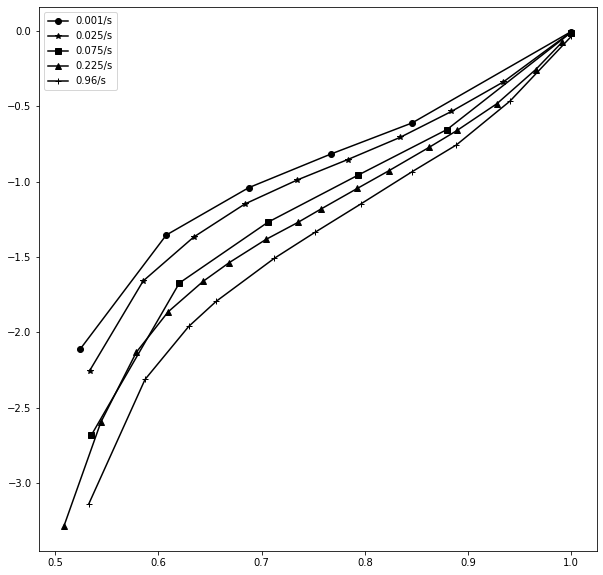

In [40]:
fig, ax = plt.subplots(figsize=[10,10])

loading_rates = [0.001, 0.025, 0.075, 0.225,  0.96]
markers       = ['ko-', 'k*-', 'ks-', 'k^-', 'k+-']
for loading_rate, marker in zip(loading_rates, markers):
    data = np.genfromtxt('Rubber/NR1/monotonic_comp/'+str(loading_rate) + '.csv', delimiter=',')
    data = np.flip(data,axis=0)
    ax.plot(data[:,0], data[:,1], marker, label = str(loading_rate) + '/s')
    with open('Rubber/NR1/monotonic_comp/'+str(loading_rate)+'.npy', 'wb') as f:
        np.save(f,data, allow_pickle=True)
ax.legend(); 


### High density rubber

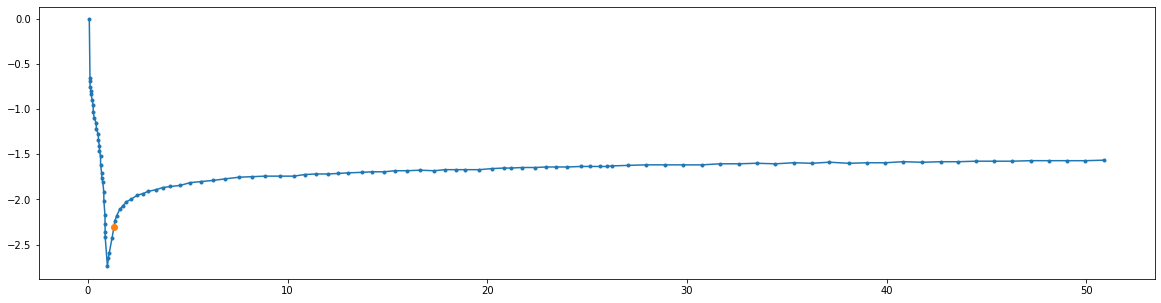

In [11]:
HDR_singlestep = np.genfromtxt('Rubber/HDR/singlestep.csv', delimiter=',')
time, sgm_x = HDR_singlestep.T
lm = np.ones(time.shape[0])*0.5
lm[0] = 1.0

avail_data_x = [time[0], time[31]]
avail_data_y = [1.0, 0.5]
lm[1:31] = np.interp(time[1:31], avail_data_x, avail_data_y)

aux = nondecreasing_time(np.array([time, lm, sgm_x]).T)
time = aux[:,0]
lm = aux[:,1]
sgm_x = aux[:,2]

fig, ax = plt.subplots(figsize=[20,5])
ax.plot(time, sgm_x,'.-')
n=31
ax.plot(time[n], sgm_x[n], 'o')

with open('Rubber/HDR/singlestep.npy', 'wb') as f:
    np.save(f,[time, lm, sgm_x], allow_pickle=True)